<a href="https://colab.research.google.com/github/harpreetsinghjk99/twitter_sentiment_analysis/blob/master/Enet_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
import numpy as np
import pandas as pd

In [52]:
import tensorflow as tf

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.models import Model
from keras import optimizers
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-aa31i4i5
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-aa31i4i5
     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18424 sha256=8bdaf8c6e134e445574b0a8d02410b035e0c137f99713374c2cf4c7e6cf81f06
  Stored in directory: /tmp/pip-ephem-wheel-cache-7jtayu8y/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [7]:
from efficientnet.keras import EfficientNetB3

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [16]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (10000,), (60000,))

In [17]:
X_train3 = np.full((60000, 28, 28, 3), 0.0)

for i, s in enumerate(X_train):
    X_train3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 
    

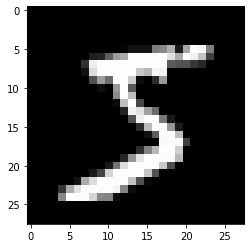

In [20]:
g = plt.imshow(X_train3[0])

In [23]:
X_test3 = np.full((10000, 28, 28, 3), 0.0)

for i, s in enumerate(X_test):
    X_test3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 

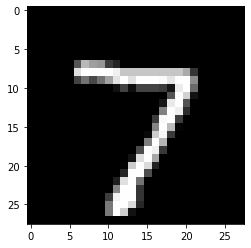

In [24]:
g = plt.imshow(X_test3[0])

In [25]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [45]:
X_test2=np.zeros((X_test.shape[0],32,32,3), dtype='float32')
X_train2=np.zeros((X_train.shape[0],32,32,3), dtype='float32')

the next step will take arround 5 min (we can look for better options
this is done to convert 28x28x3 image to 32x32x3 image as the pretrained model min required 32x32 image

In [47]:
for i in range(0,X_test2.shape[0]):
  for r in range(0,X_test2.shape[1]-4):
    for c in range(0,X_test2.shape[2]-4):
      for rgb in range(0,X_test2.shape[3]):
        X_test2[i][r][c][rgb]= X_test3[i][r][c][rgb]
for i in range(0,X_train2.shape[0]):
  for r in range(0,X_train2.shape[1]-4):
    for c in range(0,X_train2.shape[2]-4):
      for rgb in range(0,X_train2.shape[3]):
        X_train2[i][r][c][rgb]= X_train3[i][r][c][rgb]

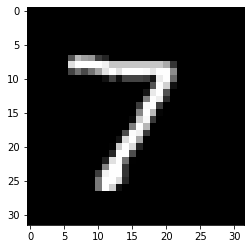

In [48]:
g = plt.imshow(X_test2[0])

In [49]:
model = EfficientNetB3(weights='imagenet', input_shape = (32,32,3), include_top=False)

44113920/44107200 [==============================] - 1s 0us/step


In [50]:
model.trainable = False

In [56]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_f = Model(model.input, predictions)
model_f.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
# Train model
history = model_f.fit(X_train2, Y_train,
              epochs=10,
              batch_size = 128,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/10
422/422 - 13s - loss: 2.0344 - accuracy: 0.3014 - val_loss: 1.6914 - val_accuracy: 0.5517
Epoch 2/10
422/422 - 11s - loss: 1.6813 - accuracy: 0.4328 - val_loss: 1.3895 - val_accuracy: 0.5993
Epoch 3/10
422/422 - 11s - loss: 1.4939 - accuracy: 0.4915 - val_loss: 1.2104 - val_accuracy: 0.7020
Epoch 4/10
422/422 - 11s - loss: 1.3684 - accuracy: 0.5352 - val_loss: 1.0993 - val_accuracy: 0.6982
Epoch 5/10
422/422 - 11s - loss: 1.2853 - accuracy: 0.5635 - val_loss: 1.0234 - val_accuracy: 0.7053
Epoch 6/10
422/422 - 11s - loss: 1.2140 - accuracy: 0.5891 - val_loss: 0.9738 - val_accuracy: 0.7100
Epoch 7/10
422/422 - 11s - loss: 1.1660 - accuracy: 0.6015 - val_loss: 0.9141 - val_accuracy: 0.7158
Epoch 8/10
422/422 - 11s - loss: 1.1220 - accuracy: 0.6196 - val_loss: 0.8266 - val_accuracy: 0.7753
Epoch 9/10
422/422 - 11s - loss: 1.0863 - accuracy: 0.6305 - val_loss: 0.8124 - val_accuracy: 0.7690
Epoch 10/10
422/422 - 11s - loss: 1.0554 - accuracy: 0.6378 - val_loss: 0.7730 - val_accura

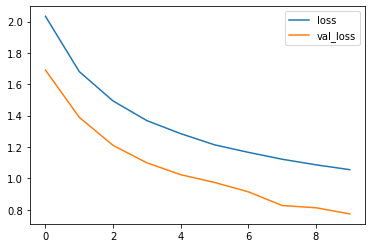

In [60]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

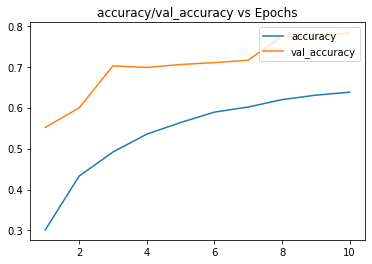

In [59]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [20,10]
i=0
x=list(history.history.keys())
for key in history.history.keys():
  if  key==x[1] or key==x[3]:
    plt.plot(range(1, 10+1), history.history[key])
#plt.axis([0, 200, 0, 2])
plt.legend((x[1],x[3]), loc='upper right')
plt.title(x[1]+'/'+x[3]+' vs Epochs')
plt.show()